<a id="TOC"> </a> <p class='lead'> Content </p>

[About](#Abt)

[About data](#Ad)

1. [Loading libraries](#1)  
2. [Loading data](#2)  
3. [Data bias detection](#4)  
4. [Additive counterfactual fair model](#8)
    1. [Classification (multiple sensitive features)](#8a)
    2. [Regression (multiple sensitive features)](#8b)
    3. [Regression on counterfactual sensitive data (multiple sensitive features)](#8c)
5. [Get in touch](#gt)


----

<a id="Abt"> </a> <p class='lead'> About </p>

The suitability of Machine Learning models is traditionally measured on its performance. A highly accurate model based on metrics like RMSE, MAPE, AUC, ROC, Gini, etc are considered to be high performing models. While such performance metrics important, are there other metrics that the data science community has been ignoring so far? The answer is yes—in the pursuit of accuracy, most models sacrifice “fairness” and “interpretability.” Rarely, a data scientist tries to dissect a model to find out if the model follows all ethical norms. This is where machine learning fairness and interpretability of models come into being.

There have been multiple instances when an ML model was found to discriminate against a particular section of society, be it rejecting female candidates during hiring, systemically disapproving loans to working women, or having a high rejection rate for darker color candidates. 

For instance, if a business differentiates against a person based on a particular sensitive feature (color, gender, race etc), it would be considered unethical and illegal. However, some ML models in banks today do exactly that, by having a feature encoding the race of each applicant. This is against the concept of fairness.

Machine Learning, as the name implies, learns whatever it is taught. It’s a ramification of what it is fed. It’s a fallacy that ML doesn’t have perspective; it has the same perspective that the data has, which was used to make it learn what it preaches today. In simple words, algorithms can echo prejudices that data explicitly or implicitly have.

*It’s important for an organization to ensure models are fair and accountable. The first step towards this would be to understand the distribution of sensitive features (like age, gender, color, race, nationality) to the outcome features (default, reject, approve, high rate, etc).*

Machine learning has been used in credit scoring for over three decades, making it one of the earliest commercial applications of the technology. 

A loan repay model may determine that age plays a significant role in the prediction of repayment because the training dataset happened to have better repayment for one age group than for another. This raises two problems: 

- The training dataset may not be representative of the true population of people of all age groups
- Even if it is representative, it is unethical to base any decision on an applicant's age, regardless of whether this is a good prediction based on historical data

However, not all undesirable bias in machine learning is illegal as it may also exist in more subtle ways. For example, a loan company may want a diverse portfolio of customers across all income levels, and thus, will deem it undesirable if they are making more loans to high income levels over low income levels. Although this is not illegal or unethical, it is undesirable for the company's strategy.

Bias can enter the system in any of the following steps. 

- The training data set may be biased in that its outcomes may be biased towards particular kinds of instances
- The algorithm that creates the model may be biased in that it may generate models that are weighted towards particular features in the input
- The test data set may be biased in that it has expectations on correct answers that may be biased.


**Case Study: Bank Loan data**
A global bank was concerned about its ML algorithm to be discriminatory and biased. The bank felt that the decision made by its ML algorithm for loan approval, credit card approval, credit limit and insurance premium needed some investigation. To illustrate one of these issues here, loan approval, we looked into the this problem from the lens of a real-world loan approval usecase.


The data-set with 205 columns or features that describes each of these loans. The prediction model can predict two types of outcomes - categorical (yes/no, true/false classes) or numerical (scores for default). Here we predict the probability of an individual to default the loan. 

Out of all the features, around 15 variables (converted to binary type) were tagged as protected or sensitive features ($\mathbf{S}$) that defined an individual's Gender, Education, Age group, Home Ownership Type (Owner, Mortgages, Tenant), Employment Status, Language (Estonian, English, other), No of Dependants (less than 3 or otherwise), Marital Status (Married, Single, Divorced, otherwise), Work Ex (Less than 10, Less than 5 or otherwise). 

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="Ad"> </a> <p class='lead'> About the data </p>

The [data-set](https://www.bondora.com/marketing/media/LoanData.zip) has data about 29688 loans and 172 columns or features (depending which parlance you prefer).
The prediction model can predict two types of outcomes - categorical (yes/no, true/false classes) or numerical (one is less than one hundred).  
**The definition of “good” class is straight forward - the class in which you are willing to invest or give a credit, but “bad” class definition may be bit complicated.**  
The data-set has data about the borrowers who were late with their payments for 7, 14, 21, 60 days and defaulted loans. How bad is a borrower if he is late for X days? True, he doesn’t respect the schedule and the contract for various reason such as harsh life, distraction or any other reason. However, once he is back on track he pays what he owns, plus late charges, which leads to higher return for additional risk.  

The defaulted loans really sounds as bad loans, right? Well, what if the loan defaults, but you get back the principal and partial interest rate? Doesn’t sound that bad, does it? What you really don’t like is the default on the loan and zero payments - let’s mark them as a “bad” ones.
After initial cleaning of the data-set and feature engineering it was time to build a simple model. 

In a classification task, precision and recall are used frequently for model metrics. The predicted value can be assigned to four classes: True Positive - real fraud (model predicted True and value was True), True Negative - not a fraud (model predicted False value and value was False), False Positive - not fraud marked as a fraud (model predicted True, however value was False) and False Negative - real fraud marked as not fraud (model predicted False, but the value was True).  
The data set after cleaning and feature transformation will be having the following list of features:

- CreditScoreEeMini
- CreditScoreEsEquifaxRisk
- CreditScoreEsMicroL
- CreditScoreFiAsiakasTietoRiskGrade
- Education
- EmploymentDurationCurrentEmployer
- EmploymentStatus
- Gender
- HomeOwnershipType
- LanguageCode
- MaritalStatus
- MonthlyPaymentDay
- NewCreditCustomer
- OccupationArea
- Rating
- UseOfLoan
- VerificationType
- NrOfDependants
- WorkExperience
- IncomeOther
- IncomeTotal
- Interest 
- LoanDuration 
- LossGivenDefault
- MonthlyPayment
- ProbabilityOfDefault 
- NrOfDependantslessthan3 
- WrExLess10 
- WrExLess5 
- Tenant
- Default


<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="1"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Loading libraries</span>
</div>

In [2]:
import logging
import numpy
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')


In [8]:
from fairlearn.metrics import *

In [28]:
# Helper functions

def mape(y_pred, y_true): #Mean Absolute Percentage Error
    df = pd.DataFrame(np.abs((y_pred - y_true) / y_true))
    df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
    xx = np.mean(df) * 100
    mape = xx.values[0]
    return mape


def acfmetrics(data, label, choice, X_test, y_true, y_pred, fav=0):
    """

    Fairness metrics for a model to compare priviliged and unpriviliged given confusion matrix for each group

    Parameters
    ----------

    :param tn_up: TN Unpriviliged
    :param fp_up: FP Unpriviliged
    :param fn_up: FN Unpriviliged
    :param tp_up: TP Unpriviliged
    :param tn_p: TN Priviliged
    :param fp_p: FP Priviliged
    :param fn_p: FN Priviliged
    :param tp_p: TP Priviliged
    :return: Eq of Opportunity, Eq of Odds, Demographic Parity, Avg Odds Difference, Predictive equality, Predictive parity, TPR, Cost

    Examples
    --------
    ACFmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

    """
    
    unfav=int(not fav)
    groups = np.unique(data[choice])
    l0 = len(data[(data[label] == fav) & (data[choice]==groups[0])])
    l1 = len(data[(data[label] == fav) & (data[choice]==groups[1])])
    
    if l0>l1:
        priv = groups[0]
    else:
        priv = groups[1]
    
    y_test = y_true
    
    #print("-------", len(y_true), len(data[choice]))
    
    tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[X_test[choice]==int(not priv)], y_pred[X_test[choice]== int(not priv)]).ravel()
    tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[X_test[choice]== priv], y_pred[X_test[choice]==priv]).ravel()


    
    eodd = equalized_odds_difference(y_true, y_pred, sensitive_features=X_test[choice])
    
    demop = demographic_parity_difference(y_true, y_pred, sensitive_features=X_test[choice])
    
    prec_p = tp_p / (tp_p + fp_p)
    prec_up = tp_up / (tp_up + fp_up)
    
    fpr = false_positive_rate_difference (y_true, y_pred, sensitive_features=X_test[choice])
    tpr = true_positive_rate_difference (y_true, y_pred, sensitive_features=X_test[choice])
    
    AOD = 0.5 * (fpr - tpr)
    
    cost_p = (fp_p * 700) + (fn_p * 300)
    cost_up = (fp_up * 700) + (fn_up * 300)
    
    my_dict = {
        'Equalized odds difference' : abs(eodd),
        'Demographic parity difference' : abs(demop),
        'Precision difference' : abs (prec_up - prec_p),
        'False positive rate difference' : abs(fpr),
        'True positive rate difference' : abs(tpr),
        'Average odds difference':  abs(AOD),
        'Total cost' : abs((cost_up+cost_p)/10000000)
    }
    
    
    return my_dict

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="2"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Loading the data</span>
</div>

In [10]:
data = pd.read_csv('finaldata.csv')

In [11]:
data["Default"].value_counts()

0.0    46752
1.0    14569
Name: Default, dtype: int64

<div class="alert alert-block alert-success">
<b>Inference:</b>
We can infer that the data has more 0's (False) when it comes to defaulter compared to 1's (True).  
Thus there are more non-defaulters than defaulters.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="4"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Data bias detection</span>
</div>

Given that a labelled dataset $\mathbf{D}$ has  $\mathbf{X_j}$ =189, $\mathbf{N_i}$ = 61321 and $\mathbf{S_j}$ =15 and a binary labelled class $ \mathbf{Y}$ (identifying defaulters) with value 0 or 1, the data had around 46752 non-defaulter instances (76\%) and 14569 defaulter (24\%) instances. 

In order to ensure the data to be fair, the probability of all groups ($\mathbf{S_a}$ and $\mathbf{S_d}$) under a protected class ($\mathbf{S}$) needs to have same probability of having favourable outcome ($\mathbf{Y^+}$). In this context, $\mathbf{S_a}$ is tagged as  advantageous group of a protected attribute ($\mathbf{S}$) that shows higher probability of having a favourable outcome ($\mathbf{Y^+}$) while $\mathbf{S_d}$ is the disadvantageous group showing a lower probability of having a favourable outcome ($\mathbf{Y^+}$). In order to mathematically check for the difference in probability of having favourable outcome in the given dataset $\mathbf{D}$, statistical parity difference and disparate impact metrics would be used.

<p class='lead'> Definition: </p>

- **sensitive group** is a feature $\mathbf{S}$ that belongs to $\mathbf{X}$ having  $\mathbf{N}$ data points and ${D}$ dimensions
- **Advantegous group / Privileged** is a level $\mathbf{T}_{a}$ of the feature $\mathbf{S}$ having $\mathbf{N}_{a}$ data points belonging to $\mathbf{X}$ having a higher probability of favourable outcome and is also called $\mathbf{S}=1$. Also $\mathbf{S_a}$
- **Disadvantegous group / Unprivileged** is a level $\mathbf{T}_{d}$ of the feature  $\mathbf{S}$ having $\mathbf{N}_{d}$ data points belonging to X which has a higher probability of favourable outcome and is also called $\mathbf{S}=0$. Also $\mathbf{S_d}$
- **Actual lables / target** with data point $\mathbf{N}$ are represnted by $\mathbf{Y}$ having values ${y}$
- **Predicted labels** are represented $\hat{Y}$

### Statistical Parity Difference and Disparate Impact  
**Probability of all groups under sensitive class to have same probability of favourable outcome**  
[Fairness Through Awareness](https://arxiv.org/pdf/1104.3913.pdf)

**Statistical Parity Difference:**
$$
\begin{align}
\mathbb{P}({Y} = 1 {|} \mathbf{S} = \mathbf{T}_{a}) = \mathbb{P}( {Y}=1{|}\mathbf{S} = \mathbf{T}_{d})
\end{align}
$$

**Disparate Impact:**


$$
\begin{align}
\frac{\mathbb{P}(Y=1{|}S=T_a)} {\mathbb{P}(Y=1{|}S=T_a)}
\end{align}
$$

The equation here is based on the logic that the representation of all groups in sensitive class should be equal. Both the equations above reflects the disparity of representation in the actual data and in all sense indicates that traces of discrimination.

In an ideal scenario, statistical parity difference should be zero and disparate impact should be 1. However for this use case, we allowed some flexibility to the underlying definition. Here, statistical parity difference needs to be between -0.1 and 0.1 while disparate impact should be between 0.90 and 1.10, thus allowing 10\% disparity for both the metrics. It was observed that out of 15 sensitive features ($\mathbf{S}$) around 5 sensitive features are having bias as per statistical parity difference and disparate impact

In [12]:
#0 if favourable [false, default = false]
#1 if unfavourable [true, default = True]
fav=0
unfav=int(not fav)

In [14]:
label_names=['Default']

protected_attribute_names=['Gender_0.0','Education_5.0','Young','HomeOwnershipType_1.0',
                           'HomeOwnershipType_8.0','EmploymentStatus_5.0',
                           "Tenant",'LanguageCode_1','LanguageCode_2',
                           "NrOfDependantslessthan3",'MaritalStatus_1.0', 
                           'MaritalStatus_3.0', 'MaritalStatus_4.0',"WrExLess10","WrExLess5"]

In [15]:
SP=[]
DI=[]
Protected=[]
for groupe in range(0, len(protected_attribute_names)):
    
    
    stat_parity = demographic_parity_difference(data['Default'], data['Default'], sensitive_features = data[protected_attribute_names[groupe]])
 
    disprate_impact = demographic_parity_ratio(data['Default'], data['Default'], sensitive_features = data[protected_attribute_names[groupe]])
    
    SP.append(stat_parity)
    DI.append(disprate_impact)
    Protected.append(protected_attribute_names[groupe])


<div class="alert alert-block alert-info">
<b>Remember:</b> 

- Statistical Parity Difference should be between -0.1 and 0.1
- Disparate Impact should be between 0.90 and 1.10
- Negative sign shows that: the unprivileged group is worse in favourable outcome that privileged class (as the formula used it probability of unprivileged - probability of privileged), so in case you see a positive value, you may want to reconsider your choice of privileged and unprivileged groups <b>using the next two plots</b>
</div>


In [16]:
SP, DI, Protected
d = pd.DataFrame({'Protected_feature':Protected,'Statistical_Parity':SP,'Disparate_Impact':DI})
#d['DI_normal']=d["Disparate_Impact"].apply(lambda x: 1/x if x < 1 else x)
#d['SP_normal']=d["Statistical_Parity"].apply(lambda x: abs(x) if x < 0 else x)


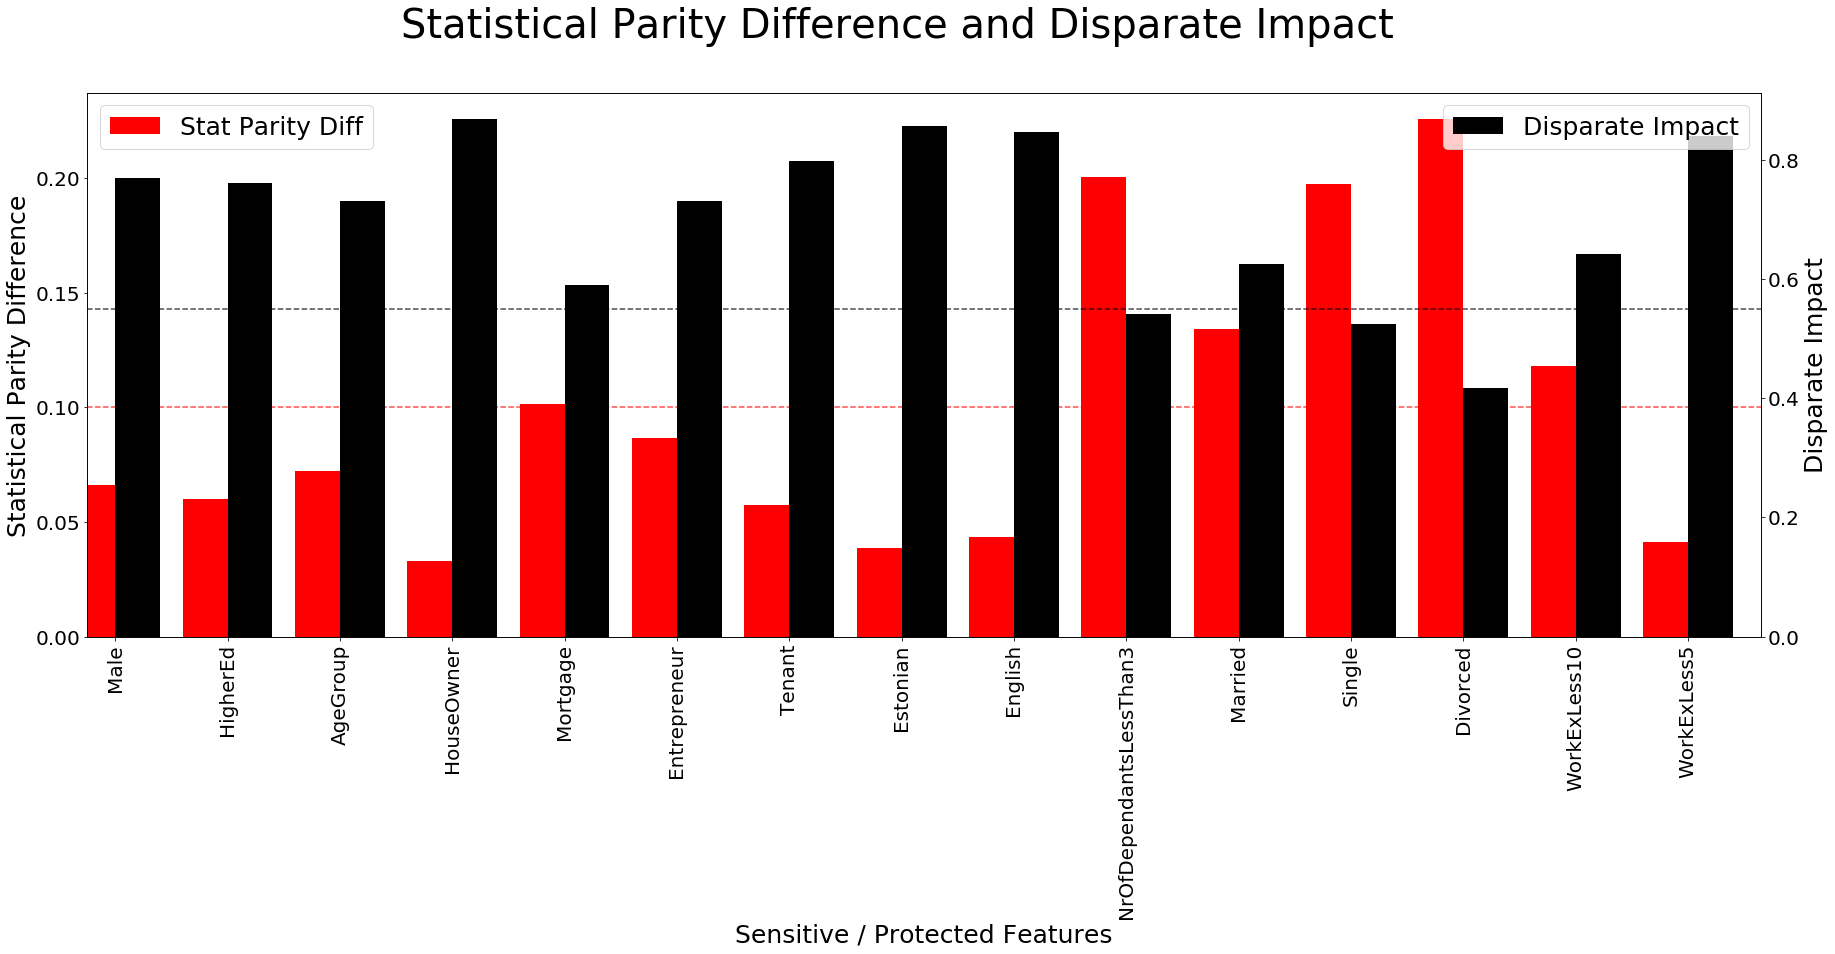

In [54]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


fig.suptitle('Statistical Parity Difference and Disparate Impact', fontsize=40, y=1)


width = 0.4
d.plot(x ='Protected_feature', y='Statistical_Parity', kind = 'bar', ax=ax, width=width, 
       position=1, color='red', legend=False, figsize=(30,10), fontsize=20)

d.plot(x ='Protected_feature', y='Disparate_Impact', kind = 'bar', ax=ax2, width=width, 
       position=0, color='black', legend=False, figsize=(30,10), fontsize=20)

ax.axhline(y=0.1, linestyle='dashed', alpha=0.7, color='red')
ax2.axhline(y=0.55, linestyle='dashed', alpha=0.7, color='black')


patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ['Stat Parity Diff'], loc='upper left', fontsize=25)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, ['Disparate Impact'], loc='upper right', fontsize=25)



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Male'
labels[1] = 'HigherEd'
labels[2] = 'AgeGroup'
labels[3] = 'HouseOwner'
labels[4] = 'Mortgage'
labels[5] = 'Entrepreneur'
labels[6] = 'Tenant'
labels[7] = 'Estonian'
labels[8] = 'English'
labels[9] = 'NrOfDependantsLessThan3'
labels[10] = 'Married'
labels[11] = 'Single'
labels[12] = 'Divorced'
labels[13] = 'WorkExLess10'
labels[14] = 'WorkExLess5'

ax.set_xticklabels(labels)


#ax2.axhline(y=.80, linestyle='dashed', alpha=0.7, color='black')

ax.set_xlabel('Sensitive / Protected Features', fontsize=25)

ax.set_ylabel('Statistical Parity Difference', fontsize=25)
ax2.set_ylabel('Disparate Impact', fontsize=25)

plt.show()

#fig.savefig('SPDnDI.svg', format='svg', dpi=500, bbox_inches='tight')
#fig.savefig('SPDnDI.png', format='png', dpi=500, bbox_inches='tight')
#beingsaved = plt.figure()
#beingsaved.savefig('SPDnDI.eps', format='eps', dpi=500)




<div class="alert alert-block alert-success">
<b>Inference:</b>
5 sensitive features (NrOfDependantslessthan3, Married, Single, Divorced and WorkExLess10) are having bias as per Statistical Parity Difference and Disparate Impact
</div>

### Calculation for Statistical Parity and Disparate Impact for a given sensitive / protected feature
**Declaring the sensitive feature (a.k.a sensitive feature) and privileged & unprivileged groups**  
Here we are trying to find bias on basis of a sensitive feature (that explains if the customer is Married or Otherwise)

In [18]:
choice = 'MaritalStatus_1.0'
pval = 0 #privileged : see the above heatmaps
upval = int(not pval) #Unprivileged
#['HomeOwnershipType_8.0', 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0', 'WrExLess10']

**Calculating Statistical Parity and Disparate Impact scores**

In [19]:
demographic_parity_difference(data['Default'], data['Default'], sensitive_features = data[choice] )

0.13402071774005922

In [20]:
demographic_parity_ratio(data['Default'], data['Default'], sensitive_features = data[choice] )

0.6254796099017254

<div class="alert alert-block alert-success">
<b>Inference:</b> 
The Statistical Parity Difference for sensitive feature Married is more than -0.10 and Disparate Impact is less than 0.90, thus there can be traces fo bias in the data. This needs further investigation. Furthermore, the negative sign shows that the unprivileged group is worse in favourable outcome that privileged class (as the formula used it probablity of unprivileged - probability of privileged)
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b> 

- Statistical Parity Difference should be between -0.1 and 0.1
- Disparate Impact should be between 0.90 and 1.10
</div>




<span style="float:right;"> [TOC](#TOC) </span>

---

<a id="8"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Additive counterfactual fair model</span>
</div>

The implementation of a [**linear counterfactually fair**](https://arxiv.org/pdf/1703.06856.pdf) model uses the each of the sensitive / protected class variable ($\mathbf{S}$) to compute the residuals for each input variable ($\mathbf{X}$) and then calculate the residuals as a difference between actual and predicted values ($\mathbf{X}-\hat{X}$) which is then used to learn a function that maps from inputs to the target variable ($\mathbf{Y}$). 

ACF,within the framework of counterfactual fairness, is the idea that we model the correlations between  ${S}$  and features in  ${X}$  by training linear models to predict each feature  ${X_j}$  using  ${S}$  as input.

Then, we can compute the residuals  ${\epsilon_{ij}}$  between predicted and true feature values for each observation  ${i}$  and feature  ${j}$ . The final model is then trained on  ${\epsilon_{ij}}$  as features to predict  ${y}$


$$
\begin{array}{c}{X_{1}=\beta_{0}+\beta_{1} S_{1}+\beta_{2} S_{2}+\cdots+\beta_{n} S_{n}+\epsilon_{1}} \\ {X_{n}=\beta_{0}+\beta_{1} S_{1}+\beta_{2} S_{2}+\cdots+\beta_{n} S_{n}+\epsilon_{n}} \\ {\epsilon_{X1}={X_{1}}-\hat{X_{1}}\left(S_{1}, S_{2}, \ldots, S_{n}\right)} \\ {\epsilon_{Xn}={X_{n}}-\hat{X_{n}}\left(S_{1}, S_{2}, \ldots, S_{n}\right)} \\ {Y=\beta_{0}+\beta_{1} \epsilon_{X1}+\cdots+\beta_{n} \epsilon_{Xn}}\end{array}
$$


ACF allows a lot of flexibility, is model-agnostic and has a straight-forward implementation. It uses the baseline model (which can be any supervised learning model) and models on  top of the baseline model.

Here for comparison, two models were created one being a full logistic regression model ($M_{LR}$) and another a set of models for ACF. For the latter, 8 independent models were created with $\mathbf{Y}$ being the 8 independent variables and $\mathbf{X}$ being the 4 sensitive / protected features. In the next steps, residuals (actual - predicted) for each of the 8 models were calculated ($\mathbf{Y}-\mathbf{\hat{Y}}$) as $\epsilon_1, \ldots, \epsilon_8$.
These 8 residuals were then fitted (logistic regression) as 
$X_{\epsilon_1}, \ldots, X_{\epsilon_8}$ on $\mathbf{Y_{default}}$. The above steps was used on training data and was evaluated using test data (20\%).

<a id="8a"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Classification (multiple sensitive features)</span>
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b>
    
- Here the target variable is:
 - Default
- The independent variables are:
 - Age
 - AppliedAmount
 - ExpectedLoss
 - LiabilitiesTotal
 - IncomeTotal
 - Interest
 - LoanDuration
 - MonthlyPayment
- The sensitive variables are:
 - NrOfDependantslessthan3
 - MaritalStatus_1.0
 - MaritalStatus_3.0
 - MaritalStatus_4.0
</div>

In [21]:
datatest = data
datatest['MonthlyPayment'].fillna((datatest['MonthlyPayment'].mean()), inplace=True)
datatest['ExpectedLoss'].fillna((datatest['ExpectedLoss'].mean()), inplace=True)
datatest['ProbabilityOfDefault'].fillna((datatest['ProbabilityOfDefault'].mean()), inplace=True)
datatest['DebtToIncome'].fillna((datatest['DebtToIncome'].mean()), inplace=True)
datatest['FreeCash'].fillna((datatest['FreeCash'].mean()), inplace=True)
datatest['LossGivenDefault'].fillna(0, inplace=True)

In [22]:
dataacf = datatest[['Default','Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal', 'IncomeTotal', 
                    'Interest', 'LoanDuration', 'MonthlyPayment',
"NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

## Full model : Logistic Regression


In [23]:
y=dataacf['Default']
x=dataacf.drop(columns=['Default'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [24]:
clf_full = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(X_train, y_train)


In [25]:
y_pred=clf_full.predict(X_test)
y_pred_prob=clf_full.predict_proba(X_test)[:,0]
print("Accuracy of the full model:", clf_full.score(X_test, y_test))

Accuracy of the full model: 0.7721157766000816


In [26]:
choice = 'MaritalStatus_3.0' #Single

In [29]:
Fullmodel = acfmetrics(dataacf, 'Default', choice, X_test, y_test, y_pred, fav=0)

## Additive counterfactual fair model

In [30]:
y=dataacf['Default']
x=dataacf.drop(columns=['Default'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

**Selecting few protected / sensitive features**

In [31]:
sens=X_train[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

**Regressing each independent variable with sensitive variable**

In [32]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

**Residual of each model**

In [33]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [34]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Fitting residuals to the dependent (target) variable**

In [35]:
fair = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(df_R, y_train)

**Regressing each independent variable with sensitive variable on test data**

In [36]:
sens=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

In [37]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

**Residual of each model on test data**

In [38]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [39]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Predicting the target variable on fair model developed above**

In [40]:
pred_fair_te = fair.predict(df_R_test)

In [42]:
ACFmodel = acfmetrics(dataacf, 'Default', choice, sens, y_test, pred_fair_te, fav=0)

**Comparing full model with ACF fair model**

In [48]:
ACF_table = pd.DataFrame({'Full Model':pd.Series(Fullmodel),'ACF Model':pd.Series(ACFmodel)})
ACF_table['Metrics'] = ACF_table.index

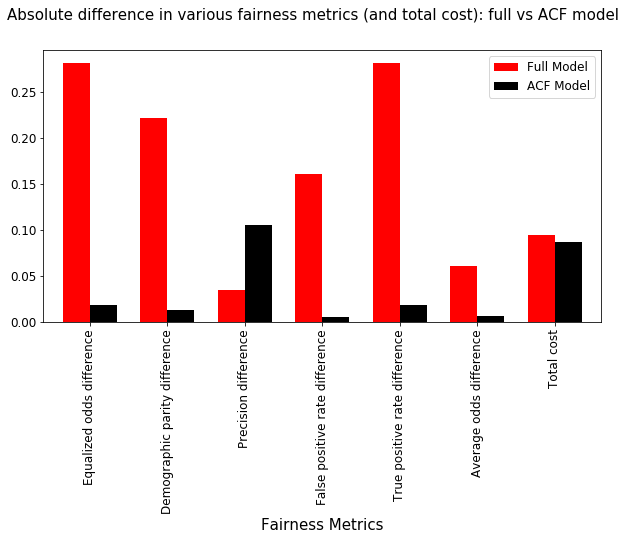

In [52]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['red', 'black'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics (and total cost): full vs ACF model',  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
All fairness metrics shows improvement and thus proving that the model is more bias-free in case of ACF fair model.  Comparing this technique with previous we see  metrics like equalised odds to be at 2.12e-02, predictive parity to be at 1.75e-01 and predictive equality to be at 1.07e-02. The cost went down phenomenally to £0.09Mn.
    
   All fairness metrics shows improvement and thus proving that the model is much bias-free in case of ACF fair model. The cost seems to have gone down in ACF fair model compared to full model. However, metrics like precision and predictive parity is showing some trade-off.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="8b"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Regression (multiple protected features)</span>
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b>

- Here the target variable:
 - ProbabilityOfDefault
- The independent variables are:
 - Age
 - AppliedAmount
 - ExpectedLoss
 - LiabilitiesTotal
 - IncomeTotal
 - Interest
 - LoanDuration
 - MonthlyPayment
- The sensitive variables are:
 - NrOfDependantslessthan3
 - MaritalStatus_1.0
 - MaritalStatus_3.0
 - MaritalStatus_4.0
 </div>

In [67]:
choice = 'MaritalStatus_3.0' #Single MaritalStatus_3.0'

In [68]:
dataacf_Lin = datatest[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment',
"NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

## Full model : Linear Regression
Here we are slecting probablity of default as the target feature and would predict this value using linear regression algorithm

In [54]:
y=dataacf_Lin['ProbabilityOfDefault']*1000
x=dataacf_Lin.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969) #6699

In [56]:
clf_full_Lin = LinearRegression().fit(X_train, y_train)
y_pred=clf_full_Lin.predict(X_test)
print("For full regression model:")
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mape(y_pred, y_test))


For full regression model:
Mean Squared Error: 0.16261414453166326
Mean Absolute Percentage Error: 68.88818654350656


In [57]:
print("For full regression model:")
A_full=mean_squared_error(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]) #pval = 0 is Privileged
B_full=mean_squared_error(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]) #pval = 1 is Unprivileged
print("Mean Squared Error: difference:", abs(B_full-A_full))

A_full=mape(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]) #pval = 0 is Privileged
B_full=mape(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]) #pval = 1 is Unprivileged
print("Mean Absolute Percentage Error: difference", abs(B_full-A_full))

For full regression model:
Mean Squared Error: difference: 0.07002010182810947
Mean Absolute Percentage Error: difference 48.85963437202827


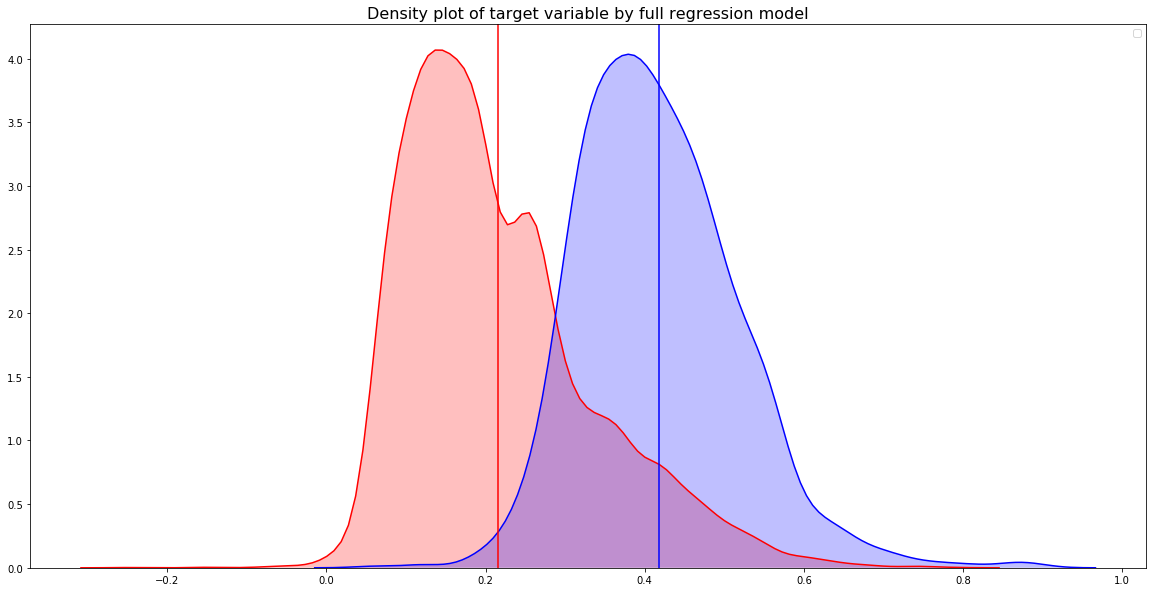

Mean difference of predicted target value (Full Model) between two groups: -0.20191808709775896
Skewness difference of predicted target value (Full Model) between two groups: 0.2799018785392401
Kurtosis difference of predicted target value (Full Model) between two groups: -0.6105971414661049


In [58]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_pred[X_test[choice]==0], shade=True, color="r")
p1=sns.kdeplot(y_pred[X_test[choice]==1], shade=True, color="b")
#print(np.mean(y_pred[X_test[choice]==0]) - np.mean(y_pred[X_test[choice]==1]))

plt.title('Density plot of target variable by full regression model', fontsize=16)
plt.axvline(np.mean(y_pred[X_test[choice]==0]), color="r")
plt.axvline(np.mean(y_pred[X_test[choice]==1]), color="b")

plt.legend('a', 'b')
plt.show()

print("Mean difference of predicted target value (Full Model) between two groups:", np.mean(y_pred[X_test[choice]==0]) - 
      np.mean(y_pred[X_test[choice]==1]))
print("Skewness difference of predicted target value (Full Model) between two groups:", skew(y_pred[X_test[choice]==0]) - 
      skew(y_pred[X_test[choice]==1]))
print("Kurtosis difference of predicted target value (Full Model) between two groups:", kurtosis(y_pred[X_test[choice]==0]) - 
      kurtosis(y_pred[X_test[choice]==1]))

<div class="alert alert-block alert-success">
<b>Inference:</b> 
It can be seen that there is a stark difference in distribution of prediction between two groups of the sensitive class. The average (mean) value seems quite different and even the spread of prediction is starkly different. There seems no uniformity in prediction for two groups of sensitive class
</div>

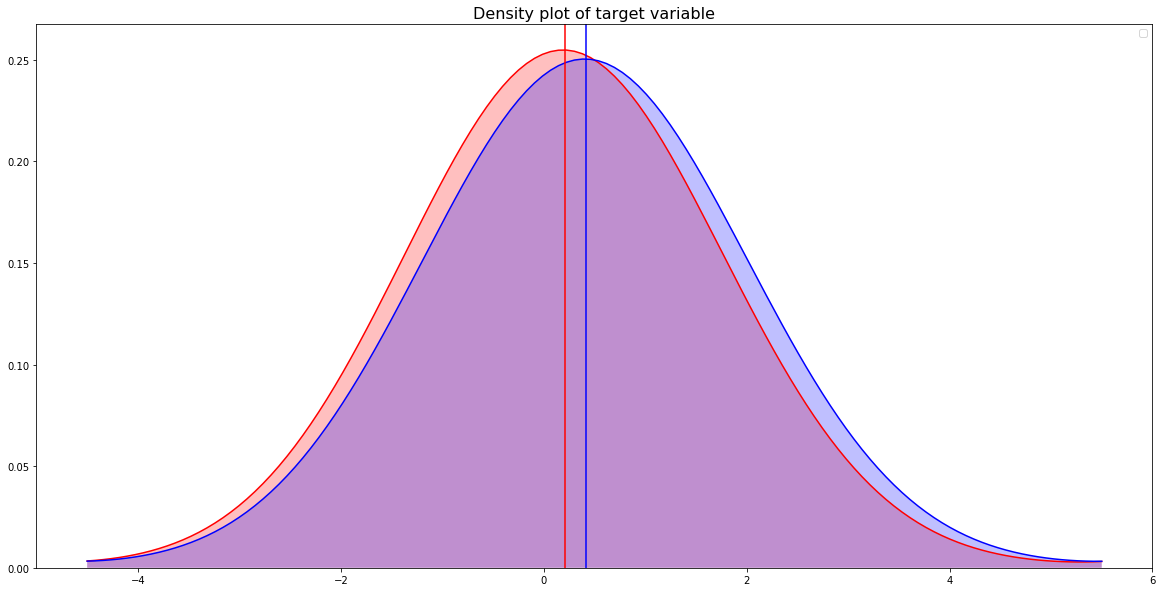

Mean difference of target value between two groups: -0.2018361282830698
Skewness difference of target value between two groups: 1.05597302295978
Kurtosis difference of target value between two groups: 1.8444059366840333


In [65]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_test[X_test[choice]==0], shade=True, color="r", bw=1.5)
p1=sns.kdeplot(y_test[X_test[choice]==1], shade=True, color="b", bw=1.5)
#print(np.mean(y_test[X_test[choice]==0])-(np.mean(y_test[X_test[choice]==1])))



plt.title('Density plot of target variable', fontsize=16)
plt.axvline(np.mean(y_test[X_test[choice]==0]), color="r")
plt.axvline(np.mean(y_test[X_test[choice]==1]), color="b")

plt.legend('a','b')
plt.show()

print("Mean difference of target value between two groups:", np.mean(y_test[X_test[choice]==0]) -
      (np.mean(y_test[X_test[choice]==1])))
print("Skewness difference of target value between two groups:", skew(y_test[X_test[choice]==0]) -
      (skew(y_test[X_test[choice]==1])))
print("Kurtosis difference of target value between two groups:", kurtosis(y_test[X_test[choice]==0]) -
      (kurtosis(y_test[X_test[choice]==1])))


<div class="alert alert-block alert-success">
<b>Inference:</b> 
The above inference is true for the actual (true) values too
</div>

## Additive counterfactual fair model

In [69]:
y=dataacf_Lin['ProbabilityOfDefault']*1000
x=dataacf_Lin.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969)

**Selecting few protected / sensitive features**

In [70]:
sens=X_train[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

**Regressing each independent variable with all sensitive variables**

In [71]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

**Residual of each models**

In [72]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [73]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Fitting residuals to the dependent (target) variable**

In [74]:
fair = LinearRegression().fit(df_R, y_train)

**Regressing each independent variable with sensitive variables on test data**

In [75]:
sens=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]
countersens = sens.replace({0:1, 1:0})

In [76]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

**Residual of each model on test data**

In [77]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [78]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Predicting the target variable on fair model developed above**

In [79]:
pred_fair_te = fair.predict(df_R_test)

In [80]:
print("For ACF model:")
print("Mean Squared Error:",mean_squared_error(y_test, pred_fair_te))
print("Mean Absolute Percentage Error:", mape(pred_fair_te, y_test))

For ACF model:
Mean Squared Error: 2442.6078661946876
Mean Absolute Percentage Error: 28.251163055694818


In [81]:
print("For ACF model:")
A_fair=mean_squared_error(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]) #pval = 0 is Privileged
B_fair=mean_squared_error(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]) #pval = 1 is Unprivileged
print("Mean Squared Error difference:", abs(B_fair-A_fair))


A_fair=mape(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]) #pval = 0 is Privileged
B_fair=mape(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]) #pval = 1 is Unprivileged
print("Mean Absolute Percentage Error difference:", abs(B_fair-A_fair))

For ACF model:
Mean Squared Error difference: 840.494582920662
Mean Absolute Percentage Error difference: 3.697792151046688


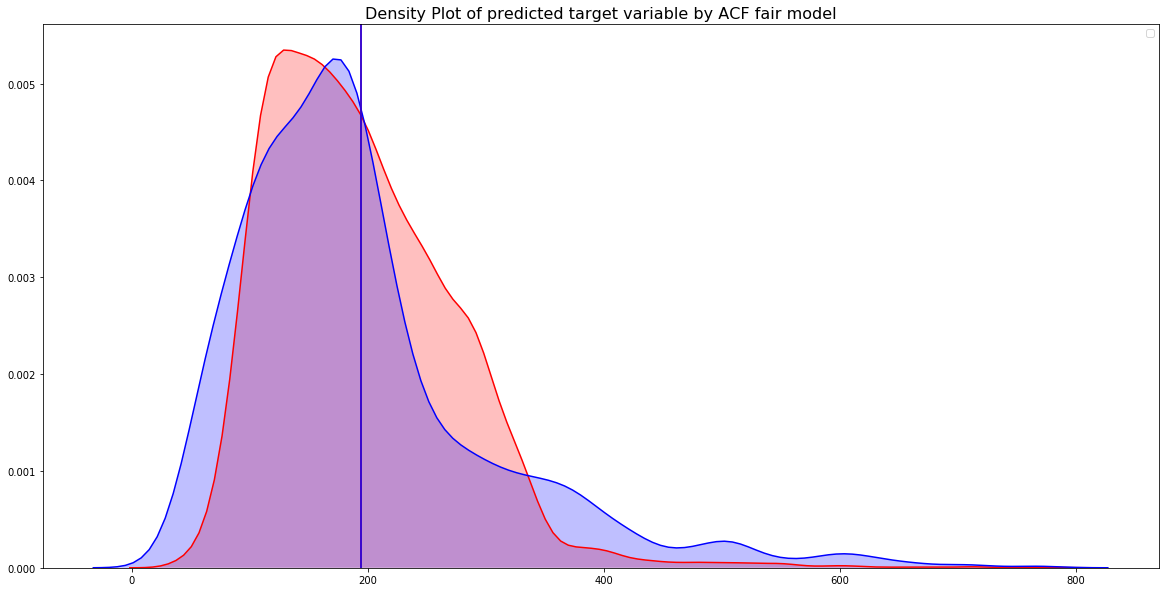

Mean difference of predicted target value (ACF Model) between two groups: 2.842170943040401e-14
Skewness difference of predicted target value (ACF Model) between two groups: -0.49521708845611934
Kurtosis difference of predicted target value (ACF Model) between two groups: -0.4439708520125407


In [82]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(pred_fair_te[sens[choice]==0], shade=True, color="r")
p1=sns.kdeplot(pred_fair_te[sens[choice]==1], shade=True, color="b")
plt.title('Density Plot of predicted target variable by ACF fair model', fontsize=16)
plt.axvline(np.mean(pred_fair_te[sens[choice]==0]), color="r" )
plt.axvline(np.mean(pred_fair_te[sens[choice]==1]), color="b")


plt.legend('a','b')
plt.show()

print("Mean difference of predicted target value (ACF Model) between two groups:", np.mean(pred_fair_te[sens[choice]==0]) - 
      np.mean(pred_fair_te[sens[choice]==1]))
print("Skewness difference of predicted target value (ACF Model) between two groups:", skew(pred_fair_te[sens[choice]==0]) - 
      skew(pred_fair_te[sens[choice]==1]))
print("Kurtosis difference of predicted target value (ACF Model) between two groups:", kurtosis(pred_fair_te[sens[choice]==0]) - 
      kurtosis(pred_fair_te[sens[choice]==1]))

<div class="alert alert-block alert-success">
<b>Inference:</b> 
In case of ACF approach, the difference in the distribution seems to have reduced significantly. The distribution of predicted values for both the group of sensitive class has become similar with the average (mean) value being equal for both the groups and the gaps between other discriptive statistics for the predictions getting narrorer.
</div>

**Summary of Model performace**

Metrics  | Data | Full Model | ACF |
------------- | ------------- | ------------ | ------------ |
Mean  | 14.3 |13.5| 2.8e-14
Skewness  | -0.72|-0.90|-0.49
Kurtosis  | -0.99|-1.92|-0.44

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The distribution of target value (probability of default) between two groups is quite varied in the original data (evident from the large difference in mean, skewness and kurtosis) and has worsed when a full model was developed using linear regression algorithm. However, the ACF model show that the distribution of target value among the two groups is very similar and the difference in mean, skewness and kurtosis has reduced dramatically.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="8c"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Regression on counterfactual sensitive data (multiple protected features)</span>
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b>
The theme of CF is <b>"What would have been my prediction if - all else held causally equal - I was member of another protected group?"</b>
    
Theoretically to check the need of ACF model for some predictor ${Y}$ with data ${D}$={${x_i}$, ${s_i}$}, first develop a full model ${M}$ with all features and fit the test data with as is sensitive features ${S}$ and note the predictions $\hat{Y}$ and error $\epsilon$. In next steps fit the model again with the inverse of ${S}$ i.e., ${S'}$ and find the predictions $\hat{Y'}$ and $\epsilon'$. In third step find ${E}$ as $\hat{Y} - \hat{Y'}$ and  $\epsilon$-$\epsilon'$ to satisfy:

$$
\begin{array}
{P}(\hat{Y}_{{s}={s'}}={Y} \mid {X}={x}, {S}={s'}) = {P}(\hat{Y}_{{s}={s}}={Y} \mid {X}={x}, {S}={s})
\end{array}
$$
    
In next set of steps, for ${M}_{ACF}$ model, fit the test data with as is sensitive features ${S}$ and note the predictions $\hat{Y}_{ACF}$ and error $\epsilon_{ACF}$. In next steps fit the model again with inverse of ${S}$ i.e., ${S'}$ and find the predictions $\hat{Y'}_{ACF}$. In third step find ${E'}$ as $\epsilon'_{ACF}$ as $\hat{Y}_{ACF}- \hat{Y'}_{ACF}$ and  $\epsilon_{ACF}-\epsilon'_{ACF}$ to satisfy:
$$
\begin{array}
{P}(\hat{Y}_{{s}={s'}}={Y} \mid {X}={x}, {S}={s'}) = {P}(\hat{Y}_{{s}={s}}={Y} \mid {X}={x}, {S}={s})
\end{array}
$$

The <b>[Counterfactual unfairness](https://arxiv.org/pdf/1907.01040.pdf) (CFU)</b> score would be  $\frac{1}{n}\sum(\epsilon - \epsilon_{ACF})^{2}$ or minimize $\frac{1}{n}\sum({E}$ - ${E'})^{2}$ . The aim should to minimize the CFU.
In an ideal case, the model ${M}$ should have zero $\epsilon$ given ${S'}$

Thus, ACF can be described as:

$$
\begin{array}
{}
\theta = \arg_{\theta}min \sum {l}({f_{\theta}(\hat \epsilon_{i}),{y_{i}})}
\\
where, \hat \epsilon_{i} \in {\hat \epsilon_{x_{1i}}\cdots\hat \epsilon_{x_{ni}}}
\end{array}
$$

</div>

In [74]:
dataacf_Lin = datatest[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment']]
sens = datatest[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

## Full model : Linear Regression
Here we are slecting probablity of default as the target feature and would predict this value using linear regression algorithm

In [75]:
fulldata = pd.concat([dataacf_Lin, sens], axis=1)

In [76]:
y=fulldata['ProbabilityOfDefault']*1000
x=fulldata.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969) #6699

In [77]:
clf_full_Lin = LinearRegression().fit(X_train, y_train)
y_pred_F = clf_full_Lin.predict(X_test)
print("For full model:")
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_F))
print("Root Mean Squared Error:", RMSE(y_pred_F, y_test))

For full model:
Mean Squared Error: 1991.352863094925
Root Mean Squared Error: 44.62457689541633


**Error for the full model with sensitive features included**

In [78]:
error = y_test - y_pred_F

### Testing the full model on counterfactual sensitive data

In [79]:
senstest=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]
test=X_test[['Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment']]

counter_senstest = senstest.replace({0:1, 1:0})
countertest = pd.concat([test, counter_senstest], axis=1)

In [80]:
y_pred_CF=clf_full_Lin.predict(countertest)
print("For full model:")
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_CF))
print("Root Mean Squared Error:", RMSE(y_pred_CF, y_test))

For full model:
Mean Squared Error: 7947.534320774168
Root Mean Squared Error: 89.14894458586802


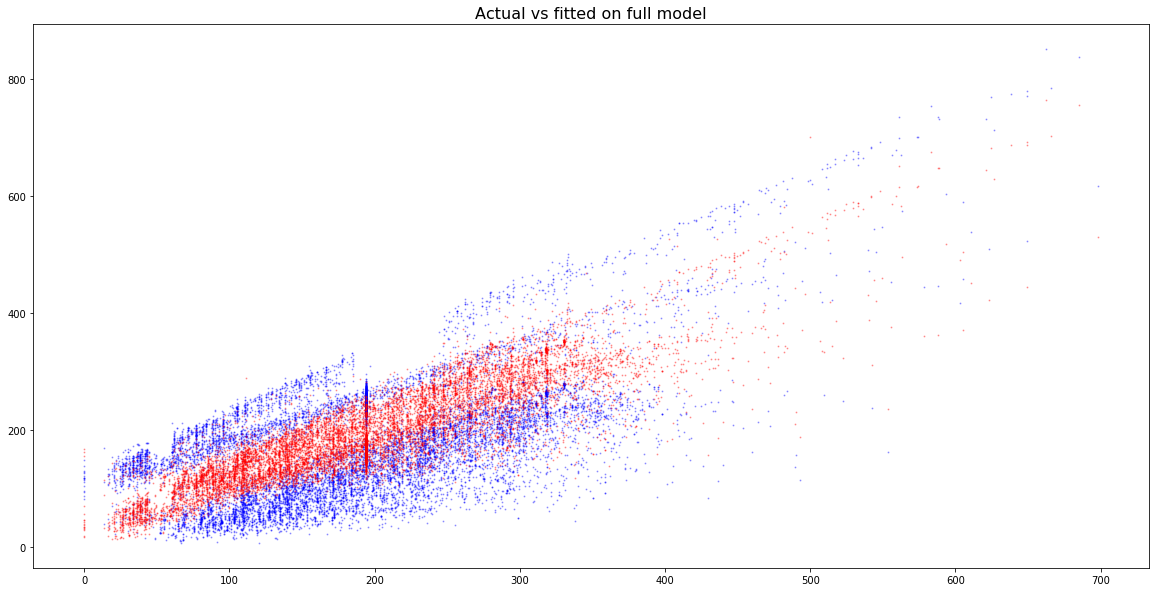

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plt.scatter(y_test, y_pred_CF, s=1, alpha=0.3, color='b')
plt.scatter(y_test, y_pred_F, s=1, alpha = 0.3, color='r')

plt.title('Actual vs fitted on full model', fontsize=16)


plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
The plot shows actual vs fitted values for pre and post counter factual treatment. Given the fact that red and blue dots are quite distinct, we can infer that the model is impacted heavily by the sensitve features. When the values of sensitive features are reserved, the predictions are quite different thus proving that in this case sensitive features has a huge impact 
</div>

**Error for the full model with counter sensitive features included**

In [82]:
errorcounter = y_test - y_pred_CF

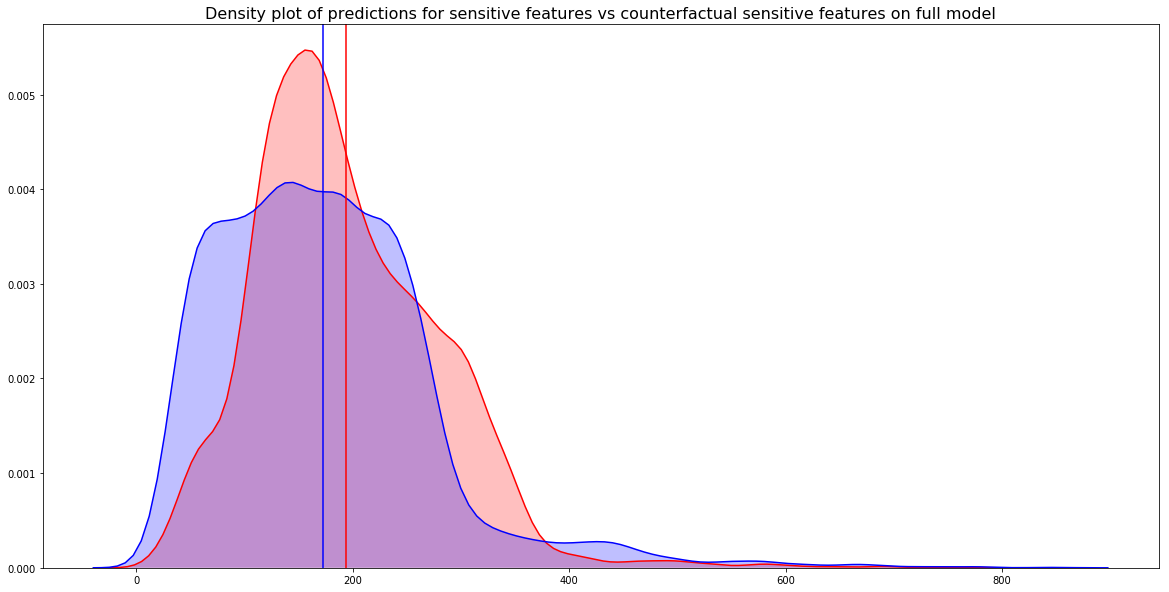

In [83]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_pred_F, shade=True, color="r")
p1=sns.kdeplot(y_pred_CF, shade=True, color="b")
plt.title('Density plot of predictions for sensitive features vs counterfactual sensitive features on full model', fontsize=16)
plt.axvline(np.mean(y_pred_F), color="r")
plt.axvline(np.mean(y_pred_CF), color="b")

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
The plot shows distribution of predicted values for pre and post counter factual treatment. Given the fact that red and blue curves are quite distinct, we can infer that the model is impacted heavily by the sensitve features. When the values of sensitive features are reserved, the predictions are quite different thus proving that in this case sensitive features has a huge impact 
</div>

**Counterfactual unfairness (CFU) score for full model**

In [84]:
CUF1 = (np.sum(np.square(errorcounter - error))/len(error))
CUF1

5949.808667508947

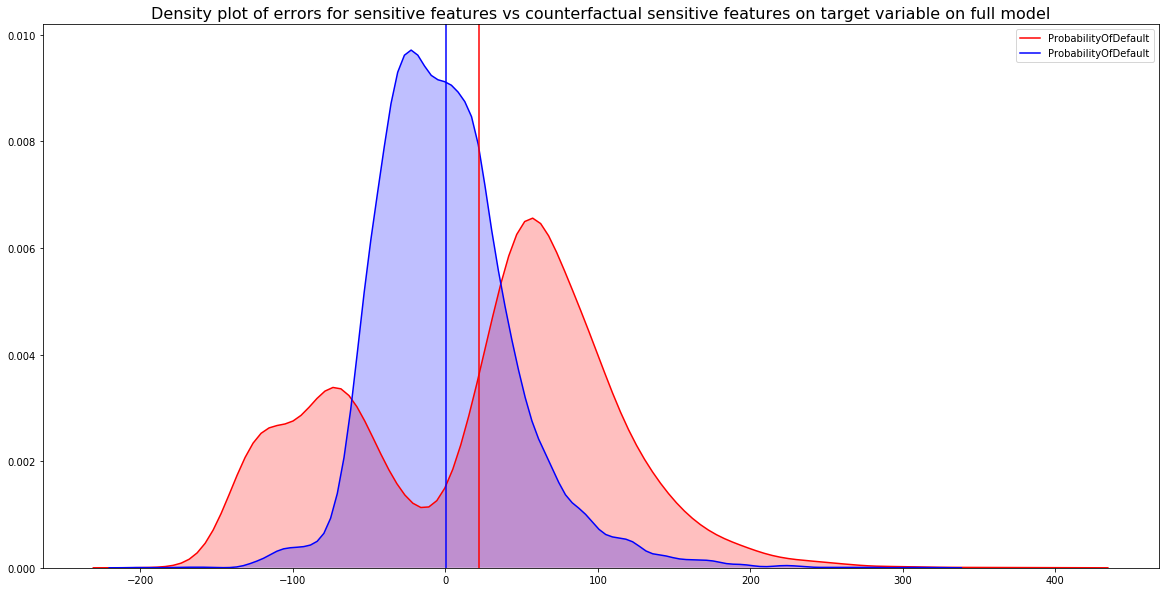

In [85]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(errorcounter, shade=True, color="r")
p1=sns.kdeplot(error, shade=True, color="b")
plt.title('Density plot of errors for sensitive features vs counterfactual sensitive features on target variable on full model', fontsize=16)
plt.axvline(np.mean(errorcounter), color="r")
plt.axvline(np.mean(error), color="b")

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
The plot shows distribution of residuals / errors values for pre and post counter factual treatment. Given the fact that red and blue curves are quite distinct, we can infer that the model is impacted heavily by the sensitve features. When the values of sensitive features are reserved, the predictions are quite different thus proving that in this case sensitive features has a huge impact 
</div>

## Additive counterfactual fair model

In [86]:
dataacf_Lin = datatest[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment', 
                        "NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

In [87]:
y=dataacf_Lin['ProbabilityOfDefault']*1000
x=dataacf_Lin.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969)

**Selecting few protected / sensitive features**

In [88]:
sens=X_train[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

**Regressing each independent variable with all sensitive variables**

In [89]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

**Residual of each models**

In [90]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [91]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Fitting residuals to the dependent (target) variable**

In [92]:
fair = LinearRegression().fit(df_R, y_train)

**Regressing each independent variable with sensitive variables on test data**

In [93]:
sens=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

In [94]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

**Residual of each model on test data**

In [95]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [96]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Predicting the target variable on fair model developed above**

In [97]:
pred_fair_te = fair.predict(df_R_test)

In [98]:
print("For ACF model:")
print("Mean Squared Error:",mean_squared_error(y_test, pred_fair_te))
print("Root Mean Squared Error:", RMSE(pred_fair_te, y_test))
print("Mean Absolute Percentage Error:", mape(pred_fair_te, y_test))

For ACF model:
Mean Squared Error: 2442.6078661946876
Root Mean Squared Error: 49.422746445282534
Mean Absolute Percentage Error: 28.251163055694818


**Error for the ACF model with residuals of sensitive features**

In [99]:
acferror = pd.Series(y_test - pred_fair_te, name="Sensitive data")

### Testing the ACF model on counterfactual sensitive data

In [100]:
countersens = sens.replace({0:1, 1:0})

In [101]:
ageR = X_test['Age'] - clf_age.predict(countersens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(countersens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(countersens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(countersens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(countersens)
InterestR = X_test['Interest'] - clf_Interest.predict(countersens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(countersens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(countersens)


In [102]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

In [103]:
pred_fair_te_acf = fair.predict(df_R_test)

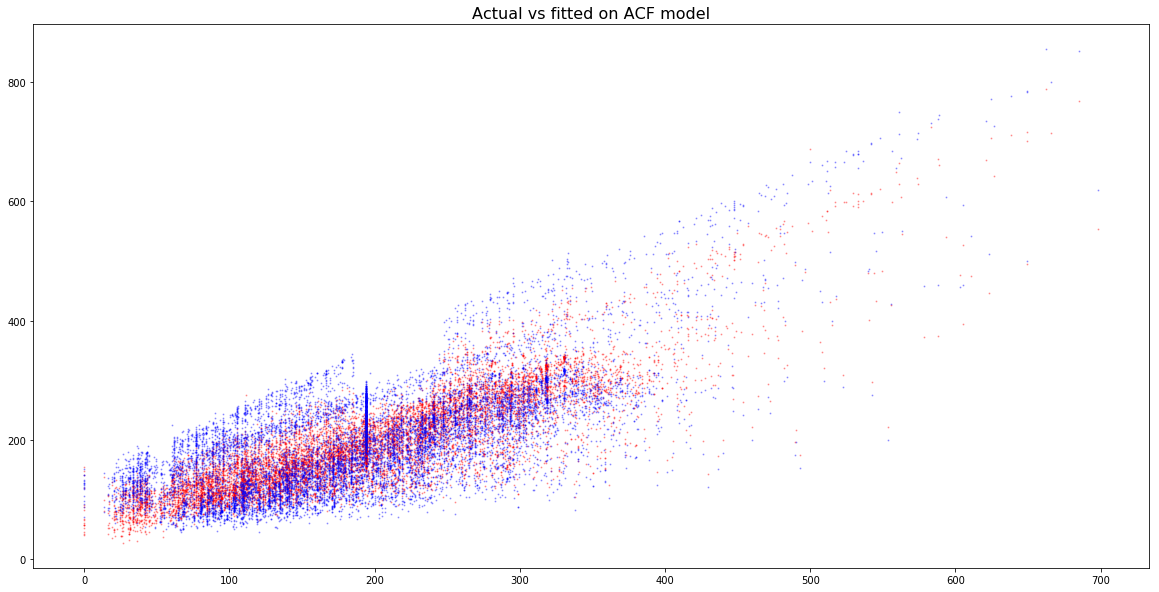

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(y_test, pred_fair_te, s=1, alpha=0.3, color='r')
plt.scatter(y_test, pred_fair_te_acf, s=1, alpha=0.3, color='b')


plt.title('Actual vs fitted on ACF model', fontsize=16)

plt.show()


<div class="alert alert-block alert-success">
<b>Inference:</b> 
The plot shows predicted vs actual values for pre and post counter factual treatment in case of ACF model. Here we see that red and blue dots are relatively less distinct, we can infer that the model is now less impacted by the sensitve features. When the values of sensitive features are reserved, the predictions are not quite different thus proving that in this case sensitive features has a less impact 
</div>

**Error for the ACF model with residuals of sensitive features**

In [105]:
counter_acferror = pd.Series(y_test - pred_fair_te_acf, name="Counterfactual sensitive data")

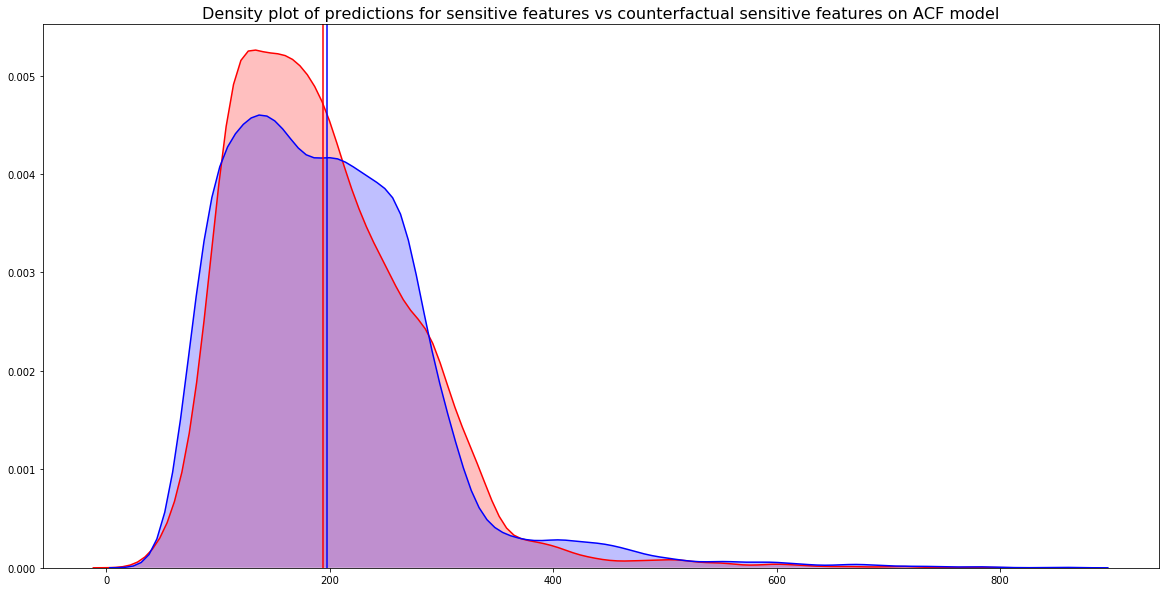

In [106]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(pred_fair_te, shade=True, color="r")
p1=sns.kdeplot(pred_fair_te_acf, shade=True, color="b")
plt.title('Density plot of predictions for sensitive features vs counterfactual sensitive features on ACF model', fontsize=16)
plt.axvline(np.mean(pred_fair_te), color="r")
plt.axvline(np.mean(pred_fair_te_acf), color="b")

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
The plot shows predicted distribution for pre and post counter factual treatment in case of ACF model. Here we see that red and blue curves are relatively hass distinct, we can infer that the model is now less impacted by the sensitve features. When the values of sensitive features are reserved, the predictions are not quite different thus proving that in this case sensitive features has a less impact 
</div>

**Counterfactual unfairness (CFU) score for ACF model**

In [107]:
CUF2 = (np.sum(np.square(counter_acferror - acferror))/len(acferror))
CUF2

1590.2688192490746

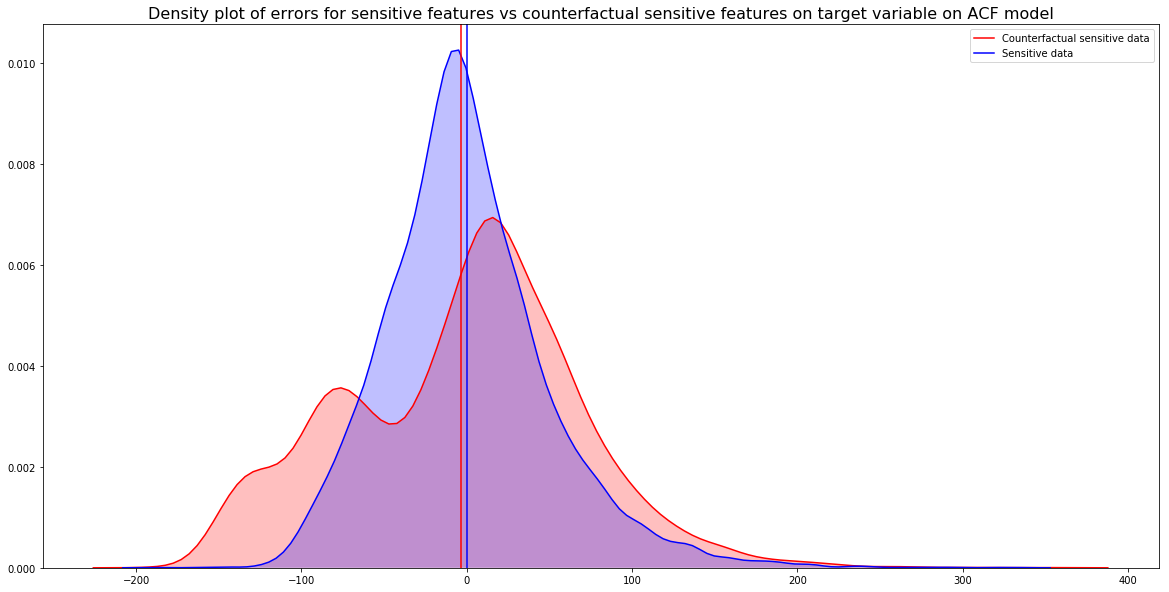

In [108]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(counter_acferror, shade=True, color="r")
p1=sns.kdeplot(acferror, shade=True, color="b")
plt.title('Density plot of errors for sensitive features vs counterfactual sensitive features on target variable on ACF model', fontsize=16)
plt.axvline(np.mean(counter_acferror), color="r")
plt.axvline(np.mean(acferror), color="b")

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
    The result from the CFU technique showed that CFUfull was 5949.80 and CFUacf was 1590.26. The CFU score for full model is much higher than CFU score of the ACF model and the distribution of predictions for factual and counterfactual in case of ACF is quite similar. This illustrates that the ACF model prediction has very less (compared to vanilla model) impact of sensitive data. In other words, the prediction wont change drastically if the fact of sensitive / protected feature is reverses or is made counterfactual.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="gt"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Get in touch</span>
</div>


<span style="font-family:Futura Next; font-size:2.0em; float: left;"> www.linkedin.com/in/srayagarwal</span>

<span style="float:right;"> [TOC](#TOC) </span>

----